In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

file = "512_2_0.25_adamw_pc"

try:
    os.mkdir("forward_vs_batch/" + file)
except:
    pass

df = pd.read_csv(f"forward_vs_batch/{file}.csv")

# Find the best accuracy over x_lr
# For each M and T, find the best accuracy and associated x_lr
rows_to_keep = df.groupby(['M', 'T'])['XLR'].agg(lambda x: x[df.loc[x.index]['accuracy'].idxmax()]).reset_index()
df = df.merge(rows_to_keep, on=['M', 'T', 'XLR'], how='inner')

In [2]:
df[(df['M'] == 'avg_init') & (df['E'] == 7)]

,Unnamed: 0,accuracy,T,E,XLR,M
7,311,0.850438,3,7,0.1,avg_init
23,343,0.855387,4,7,0.1,avg_init
39,375,0.857845,5,7,0.1,avg_init
55,439,0.861044,7,7,0.1,avg_init
71,471,0.862896,8,7,0.1,avg_init
87,503,0.863434,9,7,0.1,avg_init
103,535,0.840438,2,7,0.2,avg_init
119,663,0.858653,6,7,0.2,avg_init


In [3]:
import colorsys
from matplotlib.colors import hex2color, to_hex

def generate_palette(base_colors, p):
    rgb_colors = [hex2color(color) for color in base_colors]
    hls_colors = [colorsys.rgb_to_hls(*color) for color in rgb_colors]
    adjusted_hls_colors = [(h, p, s) for h, l, s in hls_colors]
    return [to_hex(colorsys.hls_to_rgb(*color)) for color in adjusted_hls_colors]

base_colors = ['#f44336', '#2196f3', '#4caf50', '#cddc39', '#00bcd4']

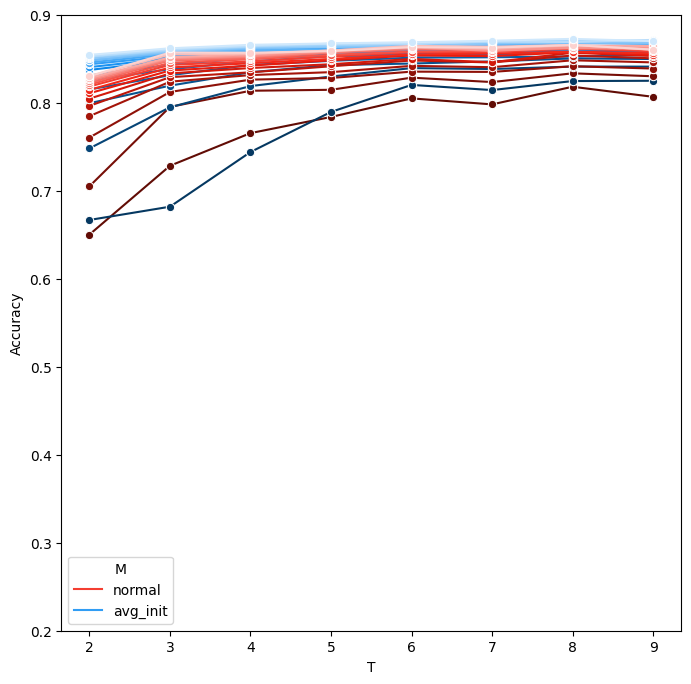

In [4]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

for i, (p, e) in enumerate(zip(np.linspace(0.2, 0.9, len(df["E"].unique())), sorted(df["E"].unique()))):
    sns.lineplot(
        data=df[df['E'] == e],
        x='T', y='accuracy', hue='M', hue_order=["normal", "avg_init"],
        marker="o",
        ax=ax,
        palette=generate_palette(base_colors[:2], p),
        legend="full" if i == len(df["E"].unique()) // 2 else False)

ax.set_ylim(0.2, 0.9)
ax.set_xmargin(0.05)
ax.set_ylabel("Accuracy")
ax.set_xticks(df["T"].unique())

plt.savefig(f"forward_vs_batch/{file}/T.png", dpi=300)
plt.show()

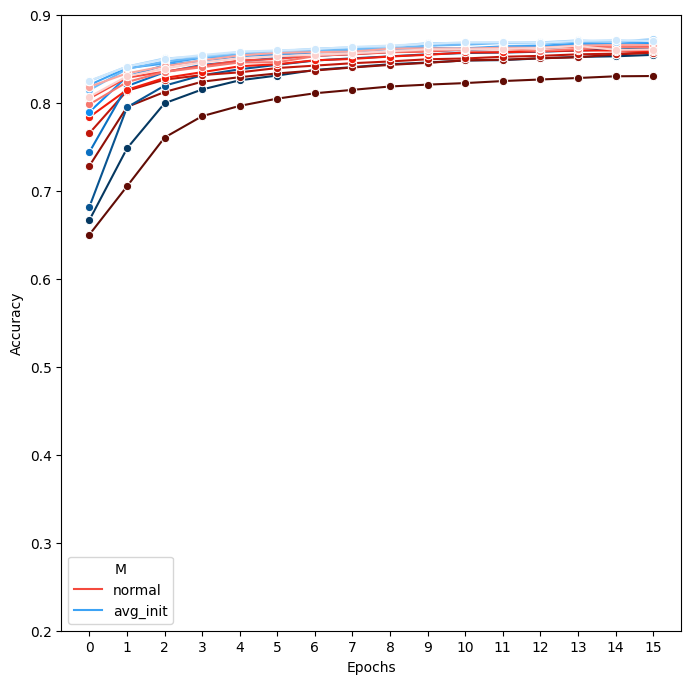

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

for i, (p, t) in enumerate(zip(np.linspace(0.2, 0.9, len(df["T"].unique())), sorted(df["T"].unique()))):
    sns.lineplot(
        data=df[df['T'] == t],
        x='E', y='accuracy', hue='M', hue_order=["normal", "avg_init"],
        marker="o",
        ax=ax,
        palette=generate_palette(base_colors[:2], p),
        legend="full" if i == len(df["T"].unique()) // 2 else False)

ax.set_ylim(0.2, 0.9)
ax.set_xmargin(0.05)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epochs")
ax.set_xticks(df["E"].unique())

plt.savefig(f"forward_vs_batch/{file}/E.png", dpi=300)
plt.show()

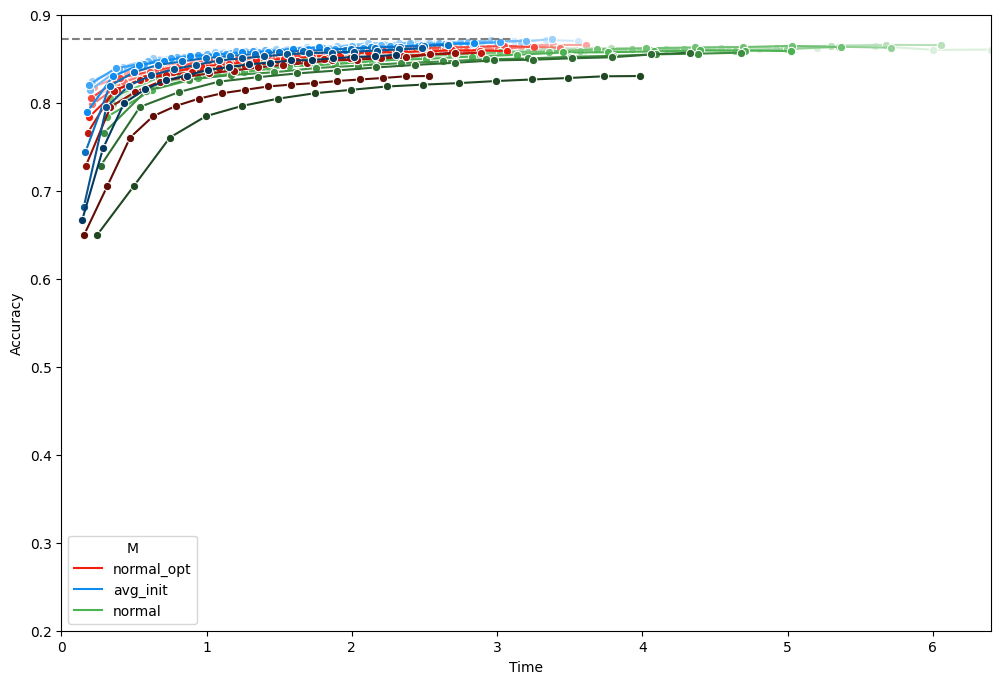

In [6]:
# Same plot as before but scaled by an estimate of the time per epoch given `M` and `T`.

time_lin_reg = {
    "normal": (0.02157, 0.2060),
    "normal_opt": (0.01129, 0.1355),
    "avg_init": (0.01121, 0.1215)
}

df_time = pd.concat([df, df[df["M"] == "normal"].copy().assign(M="normal_opt")])
df_time["time"] = df_time.apply(lambda row: (time_lin_reg[row["M"]][0] * row["T"] + time_lin_reg[row["M"]][1]) * (row["E"] + 1), axis=1)
df_time.drop("E", inplace=True, axis=1)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

for i, (p, t) in enumerate(reversed(tuple(zip(np.linspace(0.2, 0.9, len(df_time["T"].unique())), sorted(df_time["T"].unique()))))):
    sns.lineplot(
        data=df_time[df_time['T'] == t],
        x='time', y='accuracy', hue='M', hue_order=["normal_opt", "avg_init", "normal"],
        marker="o",
        ax=ax,
        palette=generate_palette(base_colors[:3], p),
        legend="full" if i == len(df_time["T"].unique()) // 2 else False)

ax.set_ylim(0.2, 0.9)
ax.set_xmargin(0.0)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Time")
ax.hlines(df["accuracy"].max(), 0.0, 3.1, colors="grey", linestyles="dashed")

plt.savefig(f"forward_vs_batch/{file}/time.png", dpi=300)
plt.show()

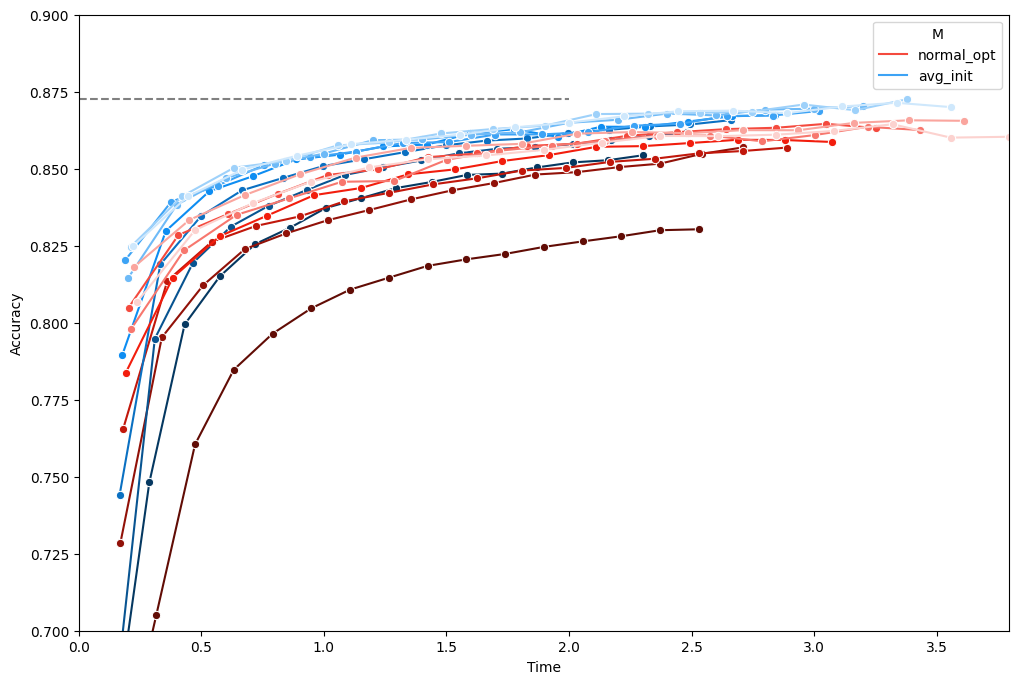

In [7]:
# Same plot as before but scaled by an estimate of the time per epoch given `M` and `T`.

time_lin_reg = {
    "normal": (0.02157, 0.2060),
    "normal_opt": (0.01129, 0.1355),
    "avg_init": (0.01121, 0.1215)
}

df_time = pd.concat([df, df[df["M"] == "normal"].copy().assign(M="normal_opt")])
df_time["time"] = df_time.apply(lambda row: (time_lin_reg[row["M"]][0] * row["T"] + time_lin_reg[row["M"]][1]) * (row["E"] + 1), axis=1)
df_time.drop("E", inplace=True, axis=1)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

for i, (p, t) in enumerate(zip(np.linspace(0.2, 0.9, len(df_time["T"].unique())), sorted(df_time["T"].unique()))):
    sns.lineplot(
        data=df_time[df_time['T'] == t],
        x='time', y='accuracy', hue='M', hue_order=["normal_opt", "avg_init"],
        marker="o",
        ax=ax,
        palette=generate_palette(base_colors[:2], p),
        legend="full" if i == len(df_time["T"].unique()) // 2 else False)

ax.set_ylim(0.7, 0.9)
ax.set_xmargin(0.0)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Time")
ax.hlines(df["accuracy"].max(), 0.0, 2.0, colors="grey", linestyles="dashed")

plt.savefig(f"forward_vs_batch/{file}/time_zoomed.png", dpi=300)
plt.show()